# "Your first map, coordinate reference systems"
> "Your first map, coordinate reference systems 연습문제"

- toc:true 
- branch: master
- badges: true
- comments: true
- author: chaeri Lim
- categories: [jupyter, python]

In [30]:
import geopandas as gpd

from learntools.core import binder
binder.bind(globals())
# from learntools.geospatial.ex1 import *

In [2]:
import os
os.getcwd()

'c:\\Users\\lg\\Desktop\\새 폴더'

# Exercise: Your First Map

## 1) Get the data.

Use the next cell to load the shapefile located at loans_filepath to create a GeoDataFrame world_loans.

In [3]:
loans_filepath="archive/kiva_loans/kiva_loans/kiva_loans.shp"

In [4]:
world_loans=gpd.read_file(loans_filepath)

## 2) Plot the data.

Run the next code cell without changes to load a GeoDataFrame world containing country boundaries

In [5]:
world_filepath=gpd.datasets.get_path('naturalearth_lowres')
world=gpd.read_file(world_filepath)
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

Use the world and world_loans GeoDataFrames to visualize Kiva loan locations across the world.

<AxesSubplot:>

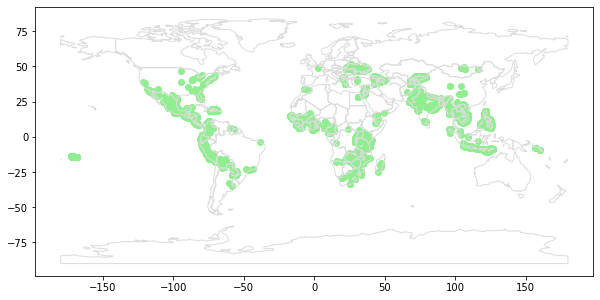

In [6]:
ax = world.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)
world_loans.plot(color='lightgreen', ax=ax)

## 3)Select loans based in the Philippines.

Next,you'll focus on loans that are based in the Philippines. Use the next code cell to create a GeoDataFrame PHL_loans which contains all rows from world_loans with loans that are based in the Philippines.

In [7]:
PHL_loans = world_loans.loc[world_loans.country.isin(['Philippines'])].copy()

## 4) Understand loans in the Philippines.

Run the next code cell without changes to load a GeoDataFrame PHL containing boundaries for all islands in the Philippines.

In [9]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("archive/Philippines_AL258.kml", driver='KML')
PHL.head()

Name Description  \
0  Autonomous Region in Muslim Mindanao               
1                          Bicol Region               
2                        Cagayan Valley               
3                            Calabarzon               
4                                Caraga               

                                            geometry  
0  MULTIPOLYGON (((119.46690 4.58718, 119.46653 4...  
1  MULTIPOLYGON (((124.04577 11.57862, 124.04594 ...  
2  MULTIPOLYGON (((122.51581 17.04436, 122.51568 ...  
3  MULTIPOLYGON (((120.49202 14.05403, 120.49201 ...  
4  MULTIPOLYGON (((126.45401 8.24400, 126.45407 8...

Use the PHL and PHL_loans GeoDataFrame to visualize loans in the Philippines.

<AxesSubplot:>

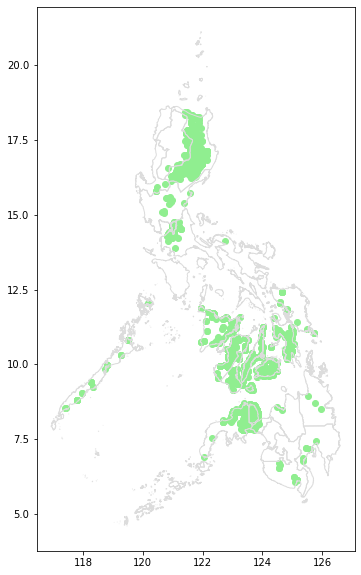

In [10]:
ax = PHL.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)
PHL_loans.plot(color='lightgreen', ax=ax)

# Exercise: Coordinate Reference Systems

In [12]:
import pandas as pd
import geopandas as gpd

from shapely.geometry import LineString

from learntools.core import binder
binder.bind(globals())
#from learntools.geospatial.ex2 import *

# Exercises

## 1) Load the data.

Run the next code cell (without changes) to load the GPS data into a pandas DataFrame birds_df.

In [13]:
birds_df = pd.read_csv("archive/purple_martin.csv", parse_dates=['timestamp'])
print("There are {} different birds in the dataset.".format(birds_df["tag-local-identifier"].nunique()))
birds_df.head()

There are 11 different birds in the dataset.


timestamp  location-long  location-lat  tag-local-identifier
0 2014-08-15 05:56:00     -88.146014     17.513049                 30448
1 2014-09-01 05:59:00     -85.243501     13.095782                 30448
2 2014-10-30 23:58:00     -62.906089     -7.852436                 30448
3 2014-11-15 04:59:00     -61.776826    -11.723898                 30448
4 2014-11-30 09:59:00     -61.241538    -11.612237                 30448

In [16]:
birds = gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df['location-long'], birds_df['location-lat']))

birds.crs={'init': 'epsg:4326'}

birds.head()

c:\Users\lg\anaconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


timestamp  location-long  location-lat  tag-local-identifier  \
0 2014-08-15 05:56:00     -88.146014     17.513049                 30448   
1 2014-09-01 05:59:00     -85.243501     13.095782                 30448   
2 2014-10-30 23:58:00     -62.906089     -7.852436                 30448   
3 2014-11-15 04:59:00     -61.776826    -11.723898                 30448   
4 2014-11-30 09:59:00     -61.241538    -11.612237                 30448   

                      geometry  
0   POINT (-88.14601 17.51305)  
1   POINT (-85.24350 13.09578)  
2   POINT (-62.90609 -7.85244)  
3  POINT (-61.77683 -11.72390)  
4  POINT (-61.24154 -11.61224)

## 2) Plot the data.

Next, we load in the 'naturelearth _lowres' dataset from GeoPandas, and set americas to a GeoDataFrame containing the boundaries of all countries in the Americas (both North and South America).Run the next code cell without changes.

In [17]:
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America', 'South America'])]
americas.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
3    35623680  North America                    Canada    CAN   1674000.0   
4   326625791  North America  United States of America    USA  18560000.0   
9    44293293  South America                 Argentina    ARG    879400.0   
10   17789267  South America                     Chile    CHL    436100.0   
16   10646714  North America                     Haiti    HTI     19340.0   

                                             geometry  
3   MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4   MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
9   MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...  
10  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...  
16  POLYGON ((-71.71236 19.71446, -71.62487 19.169...

<AxesSubplot:>

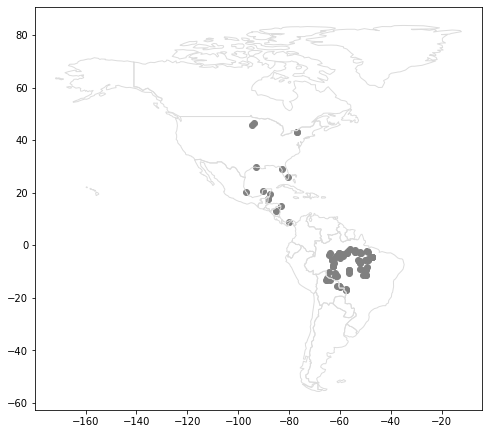

In [18]:
ax = americas.plot(figsize=(8,8), color='none', zorder=3, edgecolor='gainsboro')
birds.plot(color='grey', ax=ax)

## 3) Where does each bird start and end its journey (Part 1)

Now, we're ready to look more closely at each bird's path. Run the next code cell to create two GeoDataFrames

In [20]:
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
path_gdf.crs={'init' :'epsg:4326'}

start_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry)
start_gdf.crs={'init' :'epsg:4326'}

end_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: x[len(x)-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry)
end_gdf.crs={'init' :'epsg:4326'}

start_gdf.head()


c:\Users\lg\anaconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\lg\anaconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\lg\anaconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of 

tag-local-identifier                    geometry
0                 30048  POINT (-90.12992 20.73242)
1                 30054  POINT (-93.60861 46.50563)
2                 30198  POINT (-80.31036 25.92545)
3                 30263  POINT (-76.78146 42.99209)
4                 30275  POINT (-76.78213 42.99207)

## 4) Where does each bird  start and end its journey? (Part 2)

Use the GeoDataFrames from the question above (path_gdf, start_gdf, and end_gdf) to visualize the paths of all birds on a single map. You may also want to use the americas GeoDataFrame.

<AxesSubplot:>

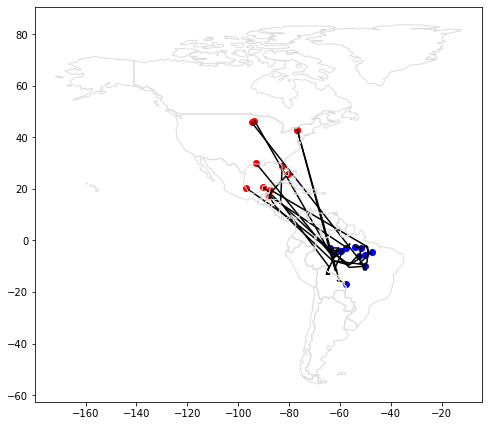

In [21]:
ax = americas.plot(figsize=(8,8), color='none', zorder=3, edgecolor='gainsboro')
start_gdf.plot(color='red', ax=ax)
path_gdf.plot(color='black', ax=ax)
end_gdf.plot(color='blue', ax=ax)

### 5) Where are the protected areas in South America? (Part 1)

It looks like all of the birds end up somewhere in South America.  But are they going to protected areas?

In the next code cell, you'll create a GeoDataFrame `protected_areas` containing the locations of all of the protected areas in South America.  The corresponding shapefile is located at filepath `protected_filepath`.

In [23]:
protected_filepath = "archive/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp"

protected_areas = gpd.read_file(protected_filepath)



### 6) Where are the protected areas in South America? (Part 2)

Create a plot that uses the `protected_areas` GeoDataFrame to show the locations of the protected areas in South America.  (_You'll notice that some protected areas are on land, while others are in marine waters._)

<AxesSubplot:>

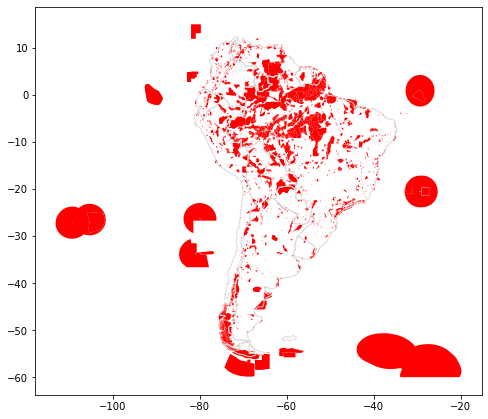

In [24]:
south_america=americas.loc[americas['continent']=='South America']

ax = south_america.plot(figsize=(8,8), color='none', zorder=3, edgecolor='gainsboro')
protected_areas.plot(color='red', ax=ax)

### 7) What percentage of South America is protected?

You're interested in determining what percentage of South America is protected, so that you know how much of South America is suitable for the birds.  

As a first step, you calculate the total area of all protected lands in South America (not including marine area).  To do this, you use the "REP_AREA" and "REP_M_AREA" columns, which contain the total area and total marine area, respectively, in square kilometers.

Run the code cell below without changes.

In [25]:
P_Area = sum(protected_areas['REP_AREA']-protected_areas['REP_M_AREA'])
print("South America has {} square kilometers of protected areas.".format(P_Area))

South America has 5396761.9116883585 square kilometers of protected areas.


In [26]:
south_america.head()

pop_est      continent          name iso_a3  gdp_md_est  \
9    44293293  South America     Argentina    ARG    879400.0   
10   17789267  South America         Chile    CHL    436100.0   
20       2931  South America  Falkland Is.    FLK       281.8   
28    3360148  South America       Uruguay    URY     73250.0   
29  207353391  South America        Brazil    BRA   3081000.0   

                                             geometry  
9   MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...  
10  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...  
20  POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...  
28  POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...  
29  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...

Calculate the total area of South America by following these steps:
- Calculate the area of each country using the `area` attribute of each polygon (with EPSG 3035 as the CRS), and add up the results.  The calculated area will be in units of square meters.
- Convert your answer to have units of square kilometeters.

In [27]:
totalArea = sum(south_america.to_crs(epsg=3035).geometry.area) / 10**6

percentage_protected = P_Area/totalArea
print('Approximately {}% of South America is protected.'.format(round(percentage_protected*100, 2)))

#Approximately 30.39% of South America is protected.

Approximately 30.39% of South America is protected.


### 8) Where are the birds in South America?

So, are the birds in protected areas?  

Create a plot that shows for all birds, all of the locations where they were discovered in South America.  Also plot the locations of all protected areas in South America.

To exclude protected areas that are purely marine areas (with no land component), you can use the "MARINE" column (and plot only the rows in `protected_areas[protected_areas['MARINE']!='2']`, instead of every row in the `protected_areas` GeoDataFrame).

<AxesSubplot:>

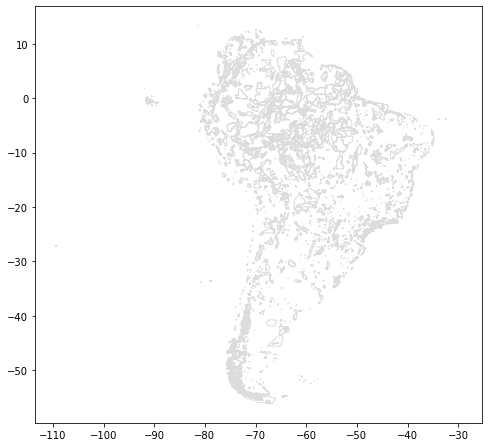

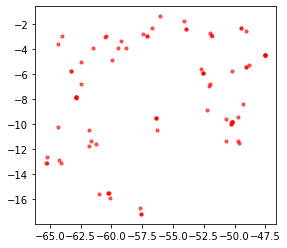

In [29]:
ax = protected_areas[protected_areas['MARINE']!='2'].plot(figsize=(8,8), color='none', zorder=3, edgecolor='gainsboro')
birds[birds.geometry.y<0].plot(color='red', alpha=0.6, markersize=10, zorder=2)